<a href="https://colab.research.google.com/github/aruaru0/pytorch-tests/blob/main/Autiomentations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install

In [ ]:
!pip install audiomentations

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.3/82.3 kB 1.7 MB/s eta 0:00:00


In [ ]:
# !pip install librosa

# import

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

import audiomentations as A
import librosa

# How to use

In [ ]:
def plot_waves(org, argumented):
  # orgとargumentedの波形を表示する

  range = np.max([np.max(np.abs(org)), np.max(np.abs(argumented))])
  ave = np.mean(np.concatenate([org, argumented]))
  up, dn = ave + range, ave - range

  plt.figure(figsize=(12, 4))
  plt.subplot(1, 2, 1)
  plt.plot(org)
  plt.ylim(dn, up)
  plt.title('Original Waveform')
  plt.subplot(1, 2, 2)
  plt.plot(argumented)
  plt.ylim(dn, up)
  plt.title('Augmented Waveform')
  plt.show()

In [ ]:
def plot_spectrum(s):
    f = np.fft.rfftfreq(len(s))
    plt.loglog(f, np.abs(np.fft.rfft(s)))[0]
    plt.show()

## 複数のデータ拡張を呼び出す

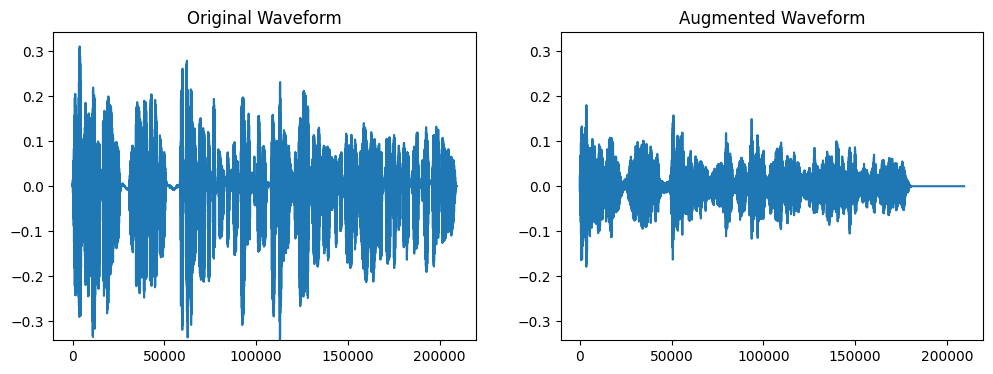

In [ ]:
transform = A.Compose([
    A.AddGaussianNoise(min_amplitude=0.001, max_amplitude=0.015, p=0.5),
    A.TimeStretch(min_rate=0.8, max_rate=1.25, p=0.5),
    A.PitchShift(min_semitones=-4, max_semitones=4, p=0.5),
])

wave, sr = librosa.load('test.wav')
augmented_wave = transform(wave, sample_rate=sr)

plot_waves(wave, augmented_wave)

## AddBackgroundNoise

/usr/local/lib/python3.10/dist-packages/audiomentations/core/transforms_interface.py:62: UserWarning: Warning: input samples dtype is np.float64. Converting to np.float32
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/audiomentations/core/audio_loading_utils.py:37: UserWarning: /content/sounds/test.wav had to be resampled from 44100 Hz to 16000 Hz. This hurt execution time.
  warnings.warn(


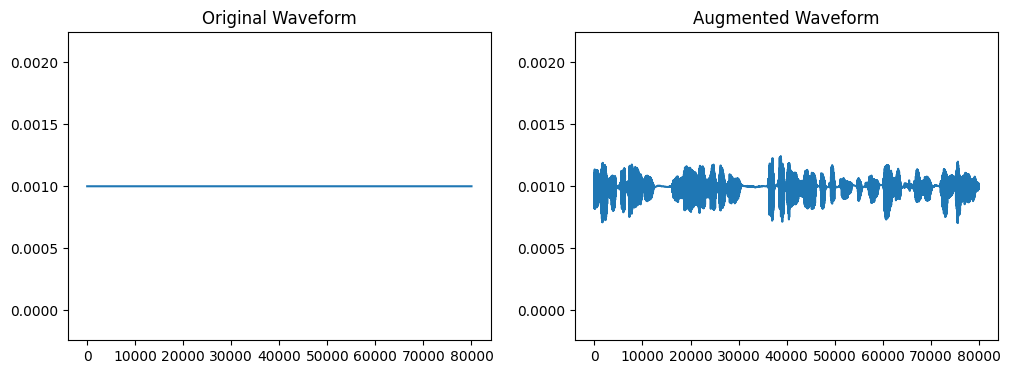

In [ ]:
transform = A.AddBackgroundNoise(sounds_path='sounds', p=1.0)

sr = 16000
wave = np.zeros(sr*5) + 0.001
augmented_wave = transform(wave, sample_rate=sr)

plot_waves(wave, augmented_wave)

## **AddColorNoise**

### pink noise

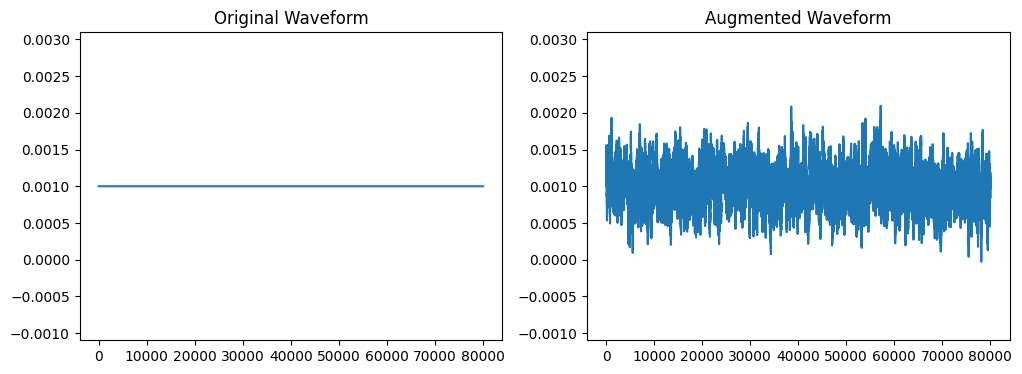

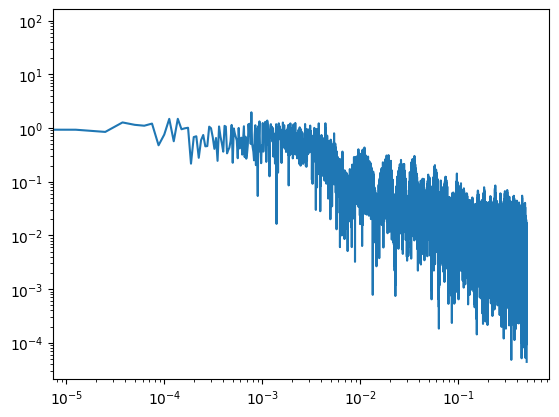

In [ ]:
transform = A.AddColorNoise(p=1.0, min_snr_db=10, max_snr_db=40,
                            min_f_decay=-3.01, max_f_decay=-3.01)

sr = 16000
wave = np.zeros(sr*5) + 0.001
augmented_wave = transform(wave, sample_rate=sr)

plot_waves(wave, augmented_wave)
plot_spectrum(augmented_wave)

#### white noise

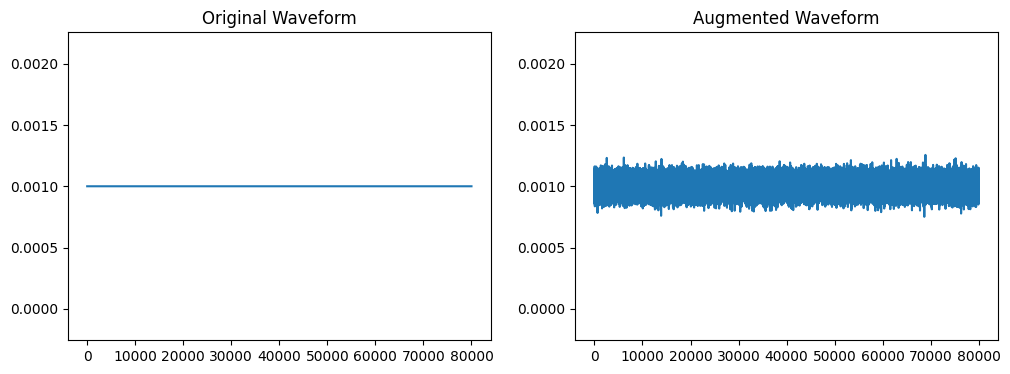

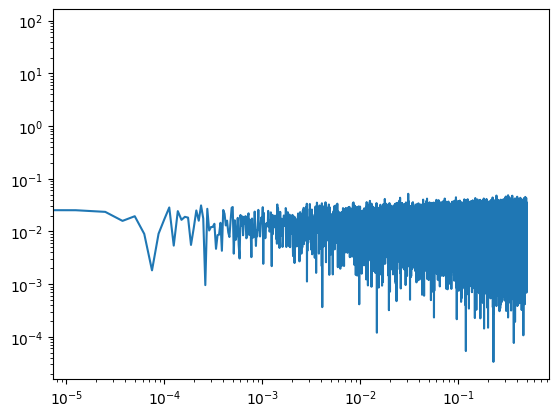

In [ ]:
transform = A.AddColorNoise(p=1.0, min_snr_db=10, max_snr_db=40,
                            min_f_decay=0, max_f_decay=0)

sr = 16000
wave = np.zeros(sr*5) + 0.001
augmented_wave = transform(wave, sample_rate=sr)

plot_waves(wave, augmented_wave)
plot_spectrum(augmented_wave)

## Gauss noise

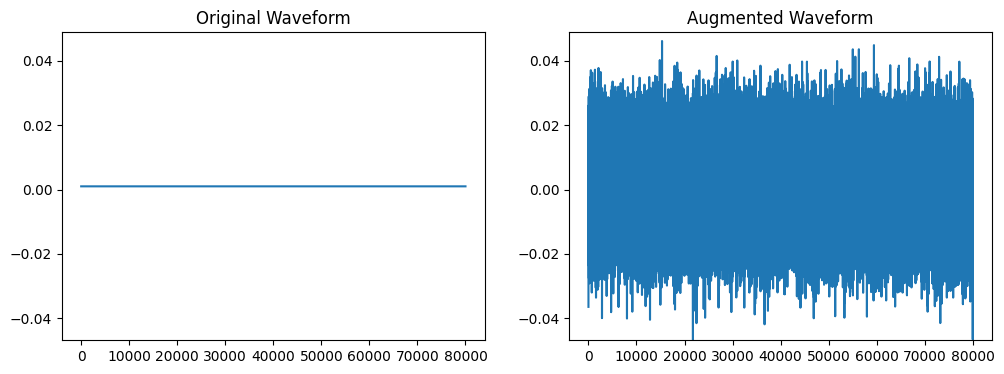

In [ ]:
transform = A.AddGaussianNoise(min_amplitude=0.001, max_amplitude=0.015, p=1.0)

sr = 16000
wave = np.zeros(sr*5) + 0.001
augmented_wave = transform(wave, sample_rate=sr)

plot_waves(wave, augmented_wave)

### Gaussian *SNR*

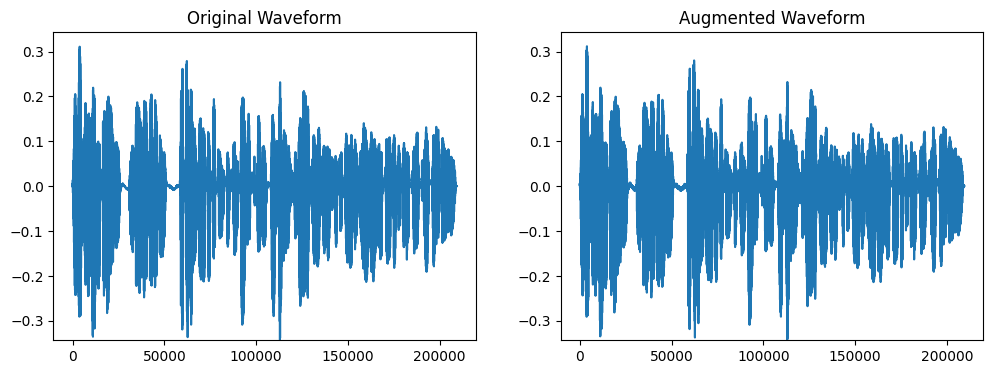

In [ ]:
transform = A.AddGaussianSNR(p = 1.0, min_snr_db=5, max_snr_db=40)
wave, sr = librosa.load('test.wav')

augmented_wave = transform(wave, sample_rate=sr)

plot_waves(wave, augmented_wave)

### AdjustDuration

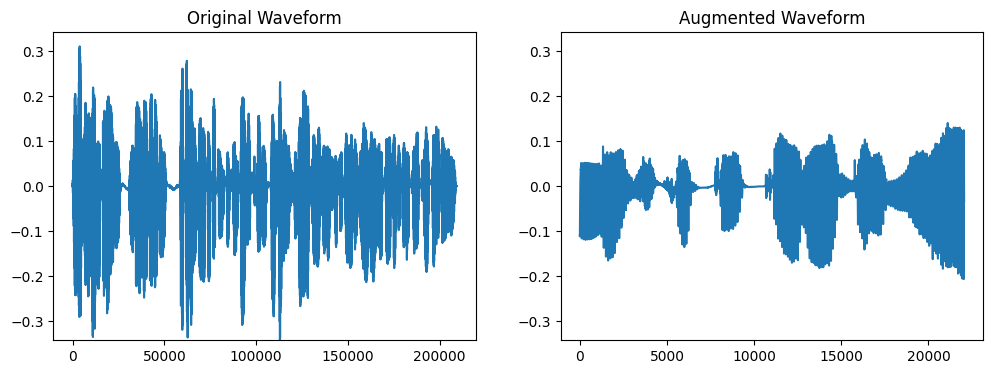

In [ ]:
wave, sr = librosa.load('test.wav')

transform = A.AdjustDuration(duration_samples=sr, p=1.0)

augmented_wave = transform(wave, sample_rate=sr)

plot_waves(wave, augmented_wave)

### Gain

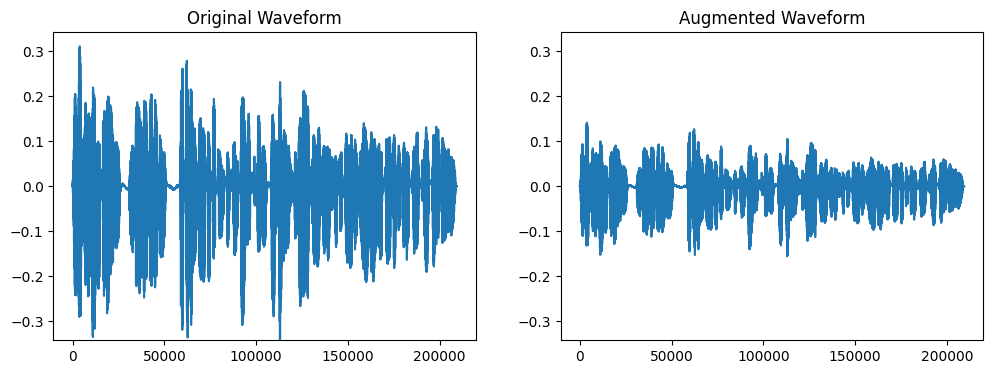

In [ ]:
transform = A.Gain(p = 1.0, min_gain_db=-12, max_gain_db=12)

wave, sr = librosa.load('test.wav')

augmented_wave = transform(wave, sample_rate=sr)

plot_waves(wave, augmented_wave)

### PitchShift

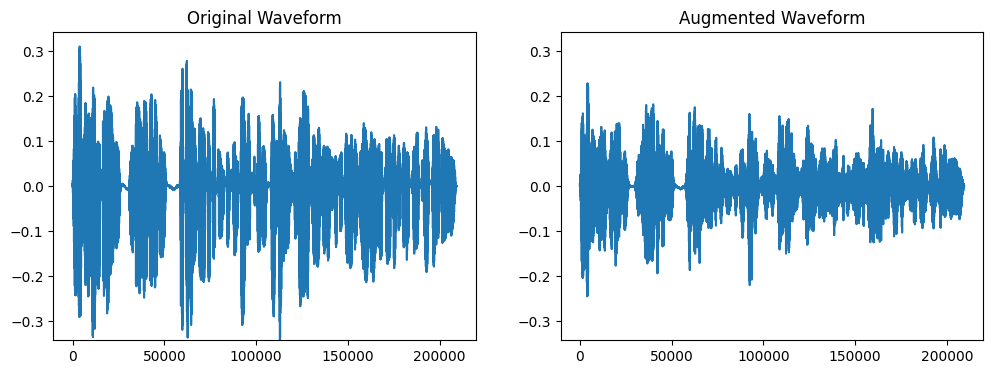

In [ ]:
transform = A.PitchShift(
    min_semitones=-5.0,
    max_semitones=5.0,
    p=1.0)

wave, sr = librosa.load('test.wav')

augmented_wave = transform(wave, sample_rate=sr)

plot_waves(wave, augmented_wave)